<a href="https://colab.research.google.com/github/Varija-Doshi/ML---Student-Grades-Prediction/blob/main/StudentGradePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, max_error
import matplotlib.pyplot as plt 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
data = pd.read_csv("drive/MyDrive/Data/student-mat.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"
# data contains about 396 rows , ie training set size = m = 396

In [100]:
print(data.head())
# To see the data of first 5 students

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]


In [101]:
print(data.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [102]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [103]:
# Taking only relevant features

data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [104]:
# considering we have to predict the G3 values 
predict_data = data["G3"]
predict = "G3"
# drop the column from the original data set and make a new array of column type (axis = 1)
X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

data = data.drop(["G3"],1)
data.head()
predict_data.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [105]:
def plot_corr(df, size=11):
    """ 
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """
    
    
    corr = df.corr()  #data frame correlation function 
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)   # color code the rectangles by correlation values
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

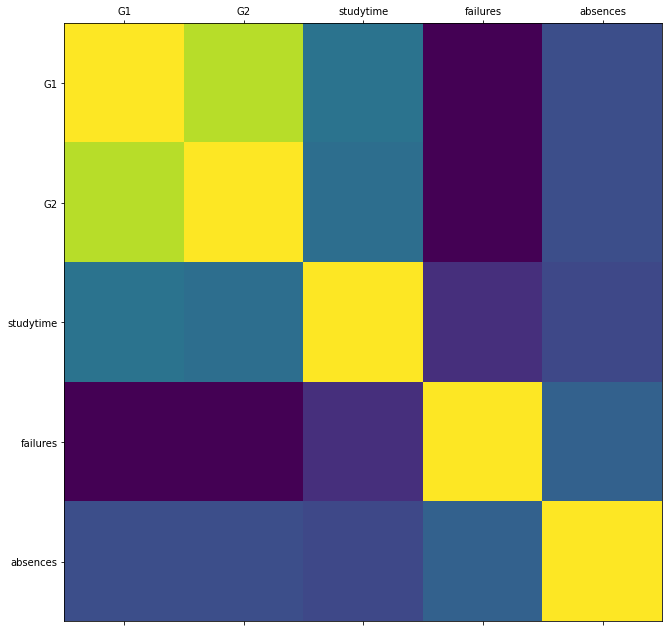

In [106]:
plot_corr(data)

In [107]:
data.corr()

,G1,G2,studytime,failures,absences
G1,1.000000,0.852118,0.160612,-0.354718,-0.031003
G2,0.852118,1.000000,0.135880,-0.355896,-0.031777
studytime,0.160612,0.135880,1.000000,-0.173563,-0.062700
failures,-0.354718,-0.355896,-0.173563,1.000000,0.063726
absences,-0.031003,-0.031777,-0.062700,0.063726,1.000000


G1           int64
G2           int64
studytime    int64
failures     int64
absences     int64
status       int64
dtype: object


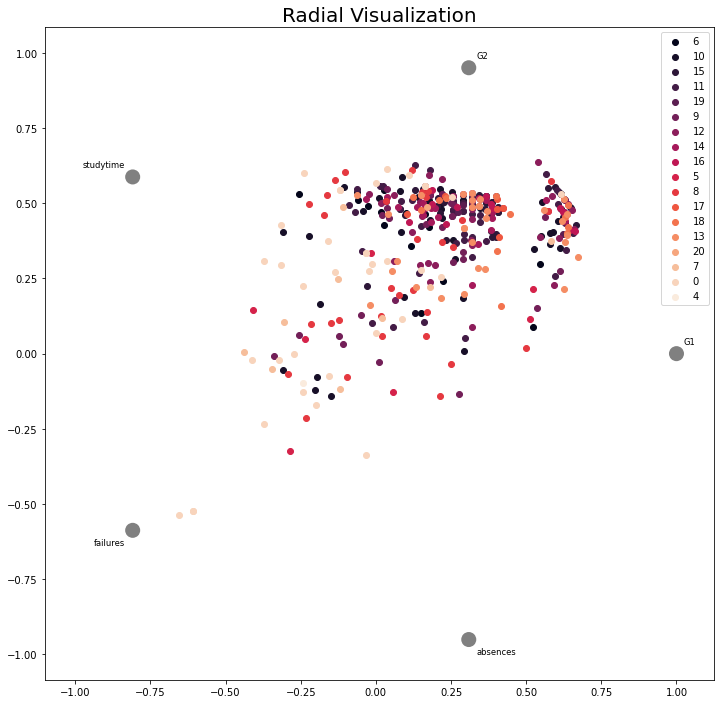

In [108]:
from pandas.plotting import radviz


fig, ax = plt.subplots(figsize=(12, 12))
new_df = data
new_df["status"] = predict_data
new_df = new_df.astype({"status":int})
print(new_df.dtypes)
radviz(new_df,"status", ax=ax, colormap="rocket")
plt.title('Radial Visualization', fontsize = 20)
plt.show()

In [109]:
# splits the data in test and train data sets train = 70% and test = 30 %

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [110]:
# Choosing the model from linear model
model = linear_model.LinearRegression()

###  Training model and Test error

In [111]:
# fit the data 
model.fit(x_train, y_train)
acc = model.score(x_test, y_test) # acc stands for accuracy 
print(acc)

# y predicted
y_pred = model.predict(x_test)

# mean square error
print('Mean squared error:', mean_squared_error(y_test, np.around(y_pred)))

#acuracy score
print('Absolute error:', mean_absolute_error(y_test, np.around(y_pred)))

print('Max error:', max_error(y_test, np.around(y_pred)))

print("Accuracy on the test data :{0:.4f}".format(acc*100))

0.8223004944906187
Mean squared error: 2.9411764705882355
Absolute error: 0.9411764705882353
Max error: 8.0
Accuracy on the test data :82.2300


### Training error 

In [112]:
acc_train = model.score(x_train, y_train) 
# Accuracy
print("Accuracy on the training data: {0:.4f}".format(acc_train*100))

Accuracy on the training data: 82.9526


### Confusion matrix and Classification Report

Confusion Matrix



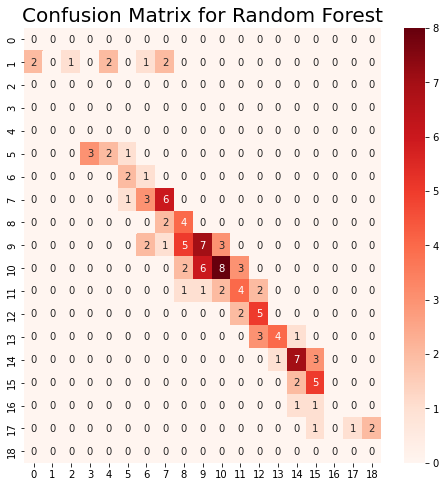

In [113]:
import seaborn as sns

print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test,np.around(y_pred) )
print("")
# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

#print("Classification Report")
#print(metrics.classification_report(y_test, np.around(y_pred) ))

In [114]:
print(X)
      

[[ 5  6  2  0  6]
 [ 5  5  2  0  4]
 [ 7  8  2  3 10]
 ...
 [10  8  1  3  3]
 [11 12  1  0  0]
 [ 8  9  1  0  5]]


 Therefore we can see that there is more correlation with G2 with G3 

In [115]:
print('Coefficient: \n', model.coef_) # These are each slope value
print('Intercept: \n', model.intercept_) # This is the intercept

#showing the predictions made by the model 

for x in range(len(y_pred)):
    print(np.around(y_pred[x]) )
    #print(np.around(y_pred[x]), x_test[x], y_test[x])

Coefficient: 
 [ 0.16471137  0.9700275  -0.11069699 -0.21338267  0.03135843]
Intercept: 
 -1.6938546415960367
7.0
9.0
6.0
15.0
11.0
9.0
12.0
10.0
13.0
15.0
12.0
11.0
10.0
6.0
19.0
16.0
3.0
15.0
11.0
9.0
9.0
7.0
16.0
10.0
8.0
19.0
9.0
14.0
16.0
9.0
13.0
10.0
4.0
13.0
13.0
8.0
16.0
7.0
11.0
12.0
15.0
15.0
12.0
7.0
11.0
15.0
10.0
15.0
5.0
5.0
9.0
10.0
12.0
16.0
8.0
10.0
14.0
10.0
12.0
8.0
8.0
13.0
11.0
13.0
-1.0
11.0
7.0
16.0
12.0
16.0
15.0
13.0
11.0
10.0
8.0
10.0
7.0
10.0
5.0
16.0
6.0
8.0
11.0
14.0
13.0
14.0
15.0
16.0
16.0
9.0
13.0
18.0
10.0
9.0
4.0
11.0
-1.0
8.0
8.0
11.0
11.0
12.0
8.0
10.0
9.0
9.0
10.0
15.0
4.0
7.0
13.0
6.0
14.0
12.0
8.0
15.0
11.0
5.0
9.0
